# Explorative Data Analysis
### after Preprocessing

In [9]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from ingest.transform import Tranformer

In [15]:
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/test.pkl")
#len(test.timestamp.unique()) # all unique so we can use it as index 
train = train.set_index('timestamp')
test = test.set_index('timestamp')

In [16]:
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,0.111557,17649664,7532,18490,0,0
2021-09-09 23:21:48.319,0.123430,19746816,5158,11520,0,0
2021-09-09 23:21:49.336,0.121031,21782528,2818,11246,0,0
2021-09-09 23:21:50.345,0.145855,25518080,4402,13775,0,0
2021-09-09 23:21:51.364,0.343448,32534528,9146,36294,0,0


## Standard Scaling

In [17]:
# Initialize Transformer
transformer = Tranformer()
# Standard Scaling
columns = train.columns.tolist()

In [7]:
train[columns]= transformer.standard(train[columns])

In [40]:
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,-0.274662,-2.097193,1.078260,0.068812,-0.015766,-0.139583
2021-09-09 23:21:48.319,-0.164245,-1.855743,0.335702,-0.170922,-0.015766,-0.139583
2021-09-09 23:21:49.336,-0.186559,-1.621365,-0.396220,-0.180346,-0.015766,-0.139583
2021-09-09 23:21:50.345,0.044296,-1.191281,0.099235,-0.093361,-0.015766,-0.139583
2021-09-09 23:21:51.364,1.881807,-0.383458,1.583098,0.681183,-0.015766,-0.139583


<AxesSubplot:xlabel='storage_written', ylabel='Count'>

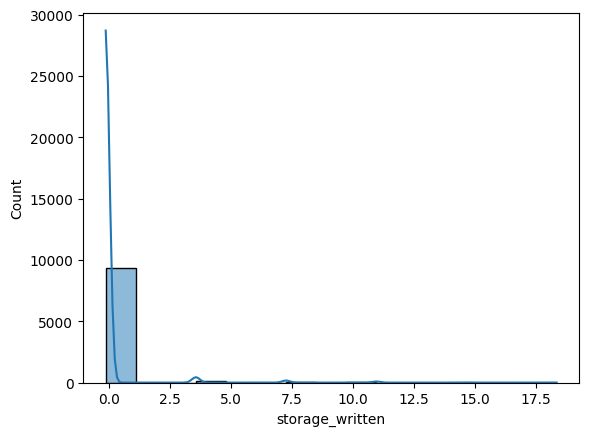

In [41]:

sns.histplot(train['storage_written'], kde=True)# left skewed


<AxesSubplot:>

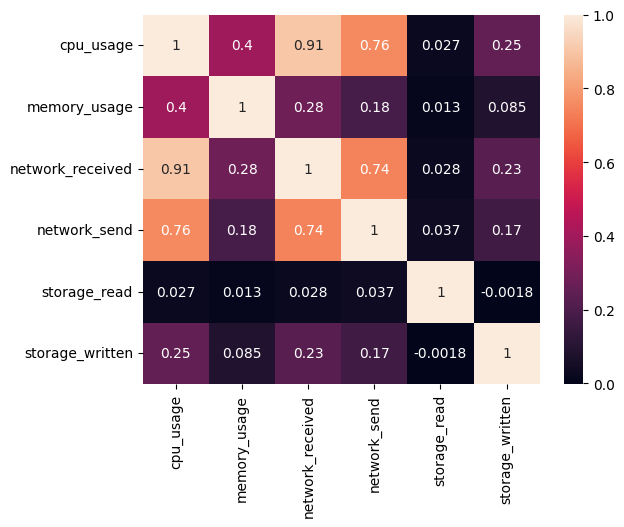

In [42]:
corr = train.corr()
sns.heatmap(corr, annot=True) # correlation doesn't change 

In [44]:
train[columns]= transformer.max_abs(train[columns])
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,-0.029375,-0.591069,0.141628,0.005918,-0.000189,-0.007607
2021-09-09 23:21:48.319,-0.017566,-0.523019,0.044094,-0.014700,-0.000189,-0.007607
2021-09-09 23:21:49.336,-0.019953,-0.456962,-0.052043,-0.015510,-0.000189,-0.007607
2021-09-09 23:21:50.345,0.004737,-0.335748,0.013034,-0.008029,-0.000189,-0.007607
2021-09-09 23:21:51.364,0.201261,-0.108073,0.207938,0.058584,-0.000189,-0.007607


<AxesSubplot:xlabel='cpu_usage', ylabel='Count'>

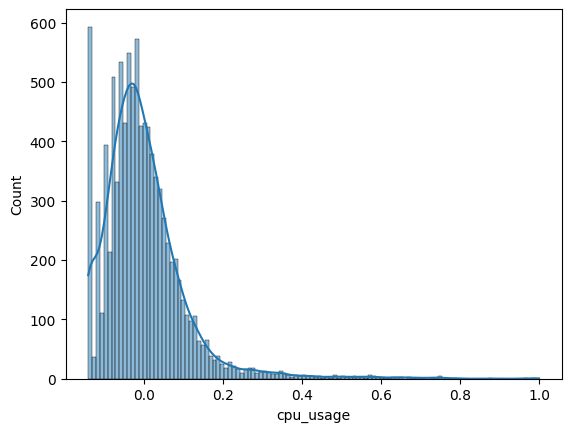

In [48]:
sns.histplot(train['cpu_usage'], kde=True)# left skewed

In [20]:
train

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,0.111557,17649664,7532,18490,0,0
2021-09-09 23:21:48.319,0.123430,19746816,5158,11520,0,0
2021-09-09 23:21:49.336,0.121031,21782528,2818,11246,0,0
2021-09-09 23:21:50.345,0.145855,25518080,4402,13775,0,0
2021-09-09 23:21:51.364,0.343448,32534528,9146,36294,0,0
...,...,...,...,...,...,...
2021-09-15 12:32:18.755,0.000471,15921152,0,0,0,0
2021-09-15 12:32:19.758,0.000488,15921152,0,0,0,0
2021-09-15 12:32:20.762,0.000343,15921152,0,0,0,0


In [21]:
train[columns]= transformer.power(train[columns], method='yeo-johnson')

<AxesSubplot:xlabel='storage_written', ylabel='Count'>

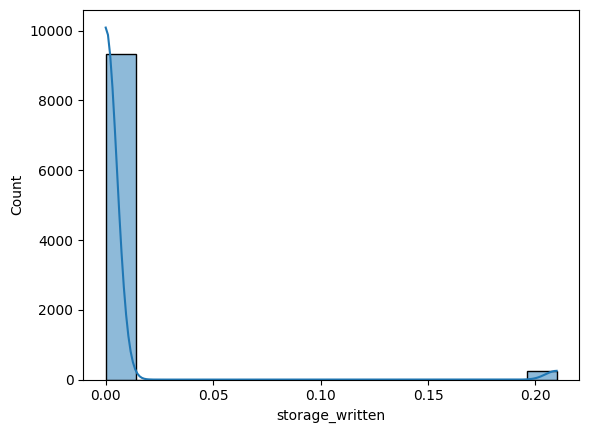

In [26]:
sns.histplot(train['storage_written'], kde=True)# left skewed